#### PRNG evolution analysis with prediction attacks

In [1]:
#Basic imports for now

# NN-Tools
import numpy as np 
import keras 

# Visualization
from IPython.display import SVG 
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# Printing
from sympy import *
init_printing(use_latex=True)

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [23]:
from PRNGs import *
from SeedGenerator import *
import time

x_train = []
y_train = []


x_test = []
y_test = []
t = 1
def split_data(x,y, numsets, setlength):
    temp = []
    for i in range(numsets):
        global t
        t *= 2  #ticks()
        #t = ticks()
        temp = Middle_Square(t,setlength)
        for a in range(len(temp)):
            temp[a] = int(temp[a])
        n = temp[-1]
        y.append(n)
        x.append(temp[:-1])
             

split_data(x_train, y_train, 10, 10)
x_train = np.array(x_train)
y_train = np.array(y_train)

split_data(x_test, y_test, 10, 10)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)



#print(x_train.shape)
#print(y_train.shape)
#print(y_train)

print(x_test)
print(x_test.shape)
#print(y_test.shape)


[[[    1943]
  [    7752]
  [     935]
  [    8742]
  [    4225]
  [    8506]
  [    3520]
  [    3904]
  [    2412]]

 [[    7772]
  [    4039]
  [    3135]
  [    8282]
  [    5915]
  [    9872]
  [    4563]
  [    8209]
  [    3876]]

 [[    1088]
  [    1837]
  [    3745]
  [     250]
  [     625]
  [    3906]
  [    2568]
  [    5946]
  [    3549]]

 [[  268435]
  [   57349]
  [  288907]
  [  467254]
  [  326300]
  [  471690]
  [  491456]
  [  528999]
  [  839942]]

 [[   73741]
  [  437735]
  [  611930]
  [  458324]
  [   60888]
  [  707348]
  [  341193]
  [  412663]
  [  290751]]

 [[  294967]
  [    5531]
  [   30591]
  [  935809]
  [  738484]
  [  358618]
  [  606869]
  [  289983]
  [   90140]]

 [[  179869]
  [  352857]
  [  508062]
  [  126995]
  [  127730]
  [  314952]
  [  194762]
  [  932236]
  [   63959]]

 [[  719476]
  [  645714]
  [  946569]
  [  992871]
  [  792822]
  [  566723]
  [  174958]
  [  610301]
  [  467310]]

 [[  877906]
  [  718944]
  [  880475]
  [  2362

In [24]:
def adversary(input_width, output_width):
    """ Returns a keras sequential model.
    :param input_width: the size of the input layer
    :param output_width: the size of the output layer
    :return:
    """
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(10, 2,
                                activation='relu',
                                input_shape=(input_width, 1),
                                name='conv_1'
                             )
         )
    model.add(keras.layers.Conv1D(10, 2, activation='relu', name='conv_2'))
    model.add(keras.layers.Conv1D(10, 2, activation='relu', name='conv_3'))

    model.add(keras.layers.MaxPool1D(1, 1, name='maxpool_1'))
    model.add(keras.layers.Dropout(0.25))
    model.add(keras.layers.Flatten(name='flatten_1'))
    model.add(keras.layers.Dense(output_width, activation='relu', name='dense_2'))
 
    
    return model
#https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
mod = adversary(9,1)
          
mod.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
mod.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv1D)              (None, 8, 10)             30        
_________________________________________________________________
conv_2 (Conv1D)              (None, 7, 10)             210       
_________________________________________________________________
conv_3 (Conv1D)              (None, 6, 10)             210       
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 6, 10)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 10)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [25]:
batch_size=2
epochs=20
history=mod.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, validation_split=.5,verbose=1, validation_data=(x_test, y_test))

Train on 10 samples, validate on 10 samples
Epoch 1/20
10/10 [==============================] - 0s 43ms/step - loss: 4502438.7116 - accuracy: 0.5000 - val_loss: 9140442412915.5996 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 4245065.9875 - accuracy: 0.5000 - val_loss: 9305982026072.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 4212576.3472 - accuracy: 0.6000 - val_loss: 8850916367438.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 4573303.5753 - accuracy: 0.5000 - val_loss: 8720508078061.5996 - val_accuracy: 0.0000e+00
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 4075947.4179 - accuracy: 0.5000 - val_loss: 8391737354960.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 4176703.1125 - accuracy: 0.5000 - val_loss: 7847275255731.5996 - val_accu

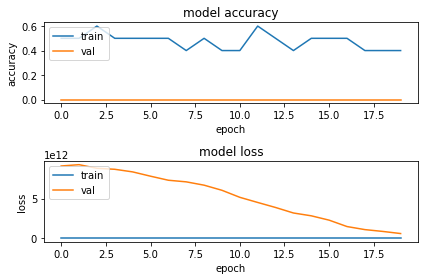

In [26]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
# summarize history for loss  
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.tight_layout()
plt.show()

In [27]:

mod.predict(x_test)

array([[1.7135305e+03],
       [1.5015848e+03],
       [5.7734631e+02],
       [6.9645320e+04],
       [1.2053431e+05],
       [1.2424747e+05],
       [8.3667234e+04],
       [1.8277362e+05],
       [1.7978425e+05],
       [1.3007330e+07]], dtype=float32)

In [ ]:
#deprecated for now .........

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Reshape
'''
#initially using fewer kernels and increasing gradually while monitoring the error rate on how it is varying
model = keras.Sequential()
model.add(Reshape((x.shape[1], 1), input_shape=(x.shape[1], )))
model.add(keras.layers.Conv1D(98, kernel_size=2,
                                activation='relu',
                                input_shape=(1,98)
                             )
         )
        
        
#data work in progress
          
model.add(keras.layers.Conv1D(64, 2, activation='relu'))
model.add(keras.layers.Conv1D(64, 2, activation='relu'))
model.add(keras.layers.Conv1D(64, 2, activation='relu'))

#test pool size and monitor what works better

model.add(keras.layers.MaxPooling1D(pool_size=(4)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dropout(0.5))
          
          
model.add(keras.layers.Dense(1, activation='softmax'))
          
    #data work in progress
          
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])
          
model.summary()
          
'''    
